In [63]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [64]:
# load the dataset
df = pd.read_csv('FODS-A2.csv')
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [65]:
df.isnull().sum()#any missing values in column

T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Appliances     0
dtype: int64

In [66]:
df[df.isnull().any(axis=1)]# any missing values in row

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances


In [67]:
X=df.iloc[:,0:26]
y=df.iloc[:,-1]
#min max normalize
X_max=X.max()
X_min=X.min()
X=(X-X_min)/(X_max-X_min)
y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)

In [68]:
order = list(range(len(y)))

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]

In [69]:
# train test split
X_train = X.iloc[shuffle,:]
y_train = y.iloc[shuffle]
X_test = X.iloc[rem,:]
y_test = y.iloc[rem]

In [70]:
X_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
1714,0.436818,0.311141,0.257985,0.469766,0.275033,0.398349,0.452899,0.286209,0.261154,0.227822,...,0.364204,0.511356,0.305484,0.306202,0.777778,0.595238,0.558974,0.378650,0.965327,0.965327
3044,0.571278,0.574914,0.419410,0.676150,0.400048,0.728073,0.452899,0.849142,0.321702,0.405431,...,0.386056,0.816497,0.482903,0.731395,0.864444,0.357143,0.600000,0.678376,0.427101,0.427101
3058,0.888068,0.531854,0.574201,0.686856,0.794761,0.525004,0.960145,0.595152,0.780593,0.281851,...,0.916753,0.727714,0.687097,0.548837,0.786667,0.142857,0.600000,0.917883,0.963831,0.963831
6504,0.422386,0.361820,0.232924,0.561955,0.390880,0.286649,0.560688,0.351142,0.435468,0.165021,...,0.509886,0.285635,0.444194,0.511628,0.737778,0.357143,0.487179,0.548358,0.577496,0.577496
449,0.493488,0.364359,0.287469,0.499504,0.313648,0.425144,0.461957,0.367811,0.254780,0.256340,...,0.344433,0.308040,0.240323,0.622481,0.746667,0.130952,0.600000,0.273859,0.076866,0.076866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.538543,0.467925,0.297297,0.663957,0.396992,0.451784,0.498188,0.542005,0.445985,0.277792,...,0.520291,0.398495,0.419355,0.594574,0.777778,0.142857,0.507692,0.539234,0.461450,0.461450
1461,0.233369,0.558353,0.165111,0.697462,0.218637,0.760087,0.317029,0.692713,0.178298,0.341094,...,0.240375,0.866657,0.333226,0.514729,0.857778,0.571429,0.343590,0.464872,0.763250,0.763250
1167,0.369588,0.544220,0.250614,0.672879,0.250030,0.725502,0.280797,0.736224,0.273901,0.273657,...,0.197711,0.813432,0.548387,0.781395,0.466667,0.428571,0.600000,0.493613,0.189175,0.189175
6451,0.655755,0.362040,0.361179,0.562054,0.418591,0.412370,0.586504,0.406504,0.493786,0.445695,...,0.500520,0.372022,0.335484,0.624419,0.893333,0.178571,0.938462,0.486770,0.407646,0.407646


*Normal form*

In [71]:
def find_theta(x, y):
    theta = np.dot(np.linalg.pinv(np.dot(x.T, x)), np.dot(x.T, y))
    return theta

In [72]:
def predict(x, theta):
    pred = np.dot(x, theta)
    return pred

In [73]:
def linear_regression(train_x,train_y,test_x,test_y):
    theta = find_theta(train_x,train_y)
    y_pred_train = predict(train_x, theta)
    # calculate rmse train
    y_pred_train = np.array(y_pred_train)
    train_y = np.array(train_y)
    rmse_train = np.sqrt(np.sum((y_pred_train - train_y)**2)/len(train_y))

    # calculate rmse test
    y_pred_test = predict(test_x, theta)
    y_pred_test = np.array(y_pred_test)
    rmse_test = np.sqrt(np.sum((y_pred_test - test_y)**2)/len(train_y))

    return rmse_train,rmse_test

In [74]:
rmse_train=[]
rmse_test=[]
def forward_feature_selection():
    # forward feature selection
    selected = []
    remaining = list(X_train.columns)
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            X_train_selected = X_train[selected + [candidate]]
            # np.c_
            X1 = np.ones((len(X_train_selected), 1))
            X_train_selected=np.c_[X1,X_train_selected]

            X_test_selected = X_test[selected + [candidate]]
            X1 = np.ones((len(X_test_selected), 1))
            X_test_selected=np.c_[X1,X_test_selected]
            # calculate rmse score
            score_train,score_test = linear_regression(X_train_selected, y_train,X_test_selected, y_test)
            scores_with_candidates.append((score_train,score_test, candidate))
        scores_with_candidates.sort(reverse=True)
        best_score_train,best_score_test, best_candidate = scores_with_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        rmse_train.append(best_score_train)
        rmse_test.append(best_score_test*2)
        print("RMSE training Error =", best_score_train)
        print("RMSE testing Error =", best_score_test*2)
        print('selected =', selected)
        print('remaining =', remaining)
    return selected

In [75]:
selected = forward_feature_selection()

RMSE training Error = 0.11888579078763346
RMSE testing Error = 0.116545107516444
selected = ['RH_out']
remaining = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.11803516455669985
RMSE testing Error = 0.1151441773431276
selected = ['RH_out', 'RH_1']
remaining = ['T1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.11632998071761853
RMSE testing Error = 0.11398950783352721
selected = ['RH_out', 'RH_1', 'RH_7']
remaining = ['T1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.1154127204435

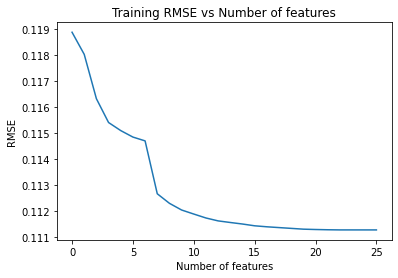

In [76]:
# plot rmse train 
plt.plot(rmse_train)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Number of features')
plt.show()

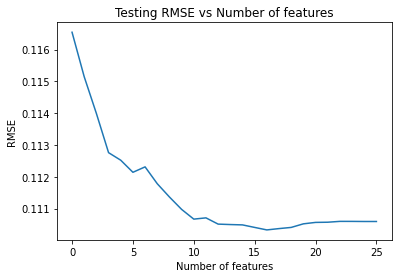

In [77]:
# plot rmse test
plt.plot(rmse_test)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Testing RMSE vs Number of features')
plt.show()

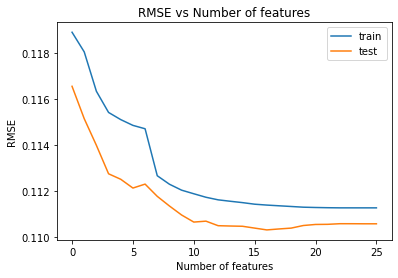

In [78]:
# plot rmse train and test
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of features')
plt.plot(rmse_train, label='train')
plt.plot(rmse_test, label='test')
plt.legend()
plt.show()

*Gradient Descent*

In [79]:
def grad_linear_regression(X_train_selected, y_train,X_test_selected, y_test):
    # initialize theta
    theta = np.zeros(X_train_selected.shape[1])
    # learning rate
    alpha = 0.001
    # number of iterations
    iterations = 1000
    # number of training examples
    m = len(y_train)
    # gradient descent
    for i in range(iterations):
        # hypothesis
        h = np.dot(X_train_selected, theta)
        # loss
        loss = h - y_train
        # gradient
        gradient = np.dot(X_train_selected.T, loss) / m
        # update theta
        theta = theta - alpha * gradient
    # calculate rmse train
    y_pred_train = np.dot(X_train_selected, theta)
    rmse_train = np.sqrt(np.sum((y_pred_train - y_train)**2)/len(y_train))

    # calculate rmse test
    y_pred_test = np.dot(X_test_selected, theta)
    rmse_test = np.sqrt(np.sum((y_pred_test - y_test)**2)/len(y_train))*2

    return rmse_train,rmse_test

In [80]:
rmse_train=[]
rmse_test=[]
def grad_forward_feature_selection():
    # forward feature selection
    selected = []
    remaining = list(X_train.columns)
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            X_train_selected = X_train[selected + [candidate]]
            # np.c_
            X1 = np.ones((len(X_train_selected), 1))
            X_train_selected=np.c_[X1,X_train_selected]

            X_test_selected = X_test[selected + [candidate]]
            X1 = np.ones((len(X_test_selected), 1))
            X_test_selected=np.c_[X1,X_test_selected]
            # calculate rmse score
            score_train,score_test = grad_linear_regression(X_train_selected, y_train,X_test_selected, y_test)
            scores_with_candidates.append((score_train,score_test, candidate))
        scores_with_candidates.sort(reverse=True)
        best_score_train,best_score_test, best_candidate = scores_with_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        rmse_train.append(best_score_train)
        rmse_test.append(best_score_test)
        print("RMSE training Error =", best_score_train)
        print("RMSE testing Error =", best_score_test)
        print('selected =', selected)
        print('remaining =', remaining)
    return selected

In [81]:
selected = grad_forward_feature_selection()

RMSE training Error = 0.12363459819699484
RMSE testing Error = 0.12007991252354075
selected = ['Press_mm_hg']
remaining = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.12222985215239796
RMSE testing Error = 0.11891083094821409
selected = ['Press_mm_hg', 'T1']
remaining = ['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.1214141764523789
RMSE testing Error = 0.118149527191103
selected = ['Press_mm_hg', 'T1', 'T6']
remaining = ['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
RMSE training Error = 0.1209109109916

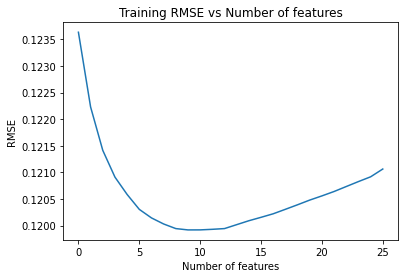

In [82]:
# plot training 
plt.plot(rmse_train)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Number of features')
plt.show()


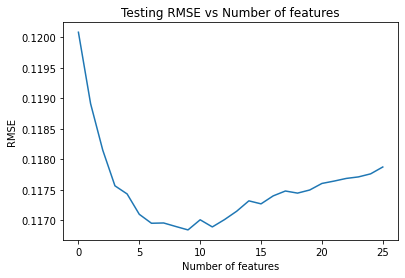

In [83]:
# plot testing 
plt.plot(rmse_test)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('Testing RMSE vs Number of features')
plt.show()


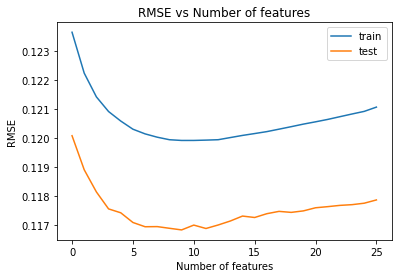

In [84]:
# plot 
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of features')
plt.plot(rmse_train, label='train')
plt.plot(rmse_test, label='test')
plt.legend()
plt.show()